In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import make_scorer, accuracy_score ,precision_score,recall_score,f1_score
from sklearn import tree
from sklearn import metrics,model_selection,preprocessing
from IPython.display import Image,display
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import pickle 
import warnings 
warnings.simplefilter('ignore')

In [2]:
df = pd.read_excel('status-idm-dan-indikator-pembentuk-idm-menurut-kabupaten-kota-di-kalimantan-barat-2020.xlsx')
df.head()

,Kabupaten,Kecamatan,Desa,KODE DESA,Jarak ke sarana kesehatan terdekat,"Ketersediaan Tenaga Kesehatan(bidan,Dokter dan Nakes Lain)","Askes ke poskesdes, polindes atau posyandu",Tingkat Aktivitas Posyandu,Tingkat Kepesertaan BPJS,Akses Pendidikan Dasar SD/MI < 3 KM,...,Jalan yang Dapat Dilalui oleh Kendaraan Bermotor Roda Empat atau Lebih,Kualitas Jalan Desa,"Pencemaran Air, Tanah dan Udara","Kejadian Bencana Alam (Banjir, Tanah Longsor, Kebakaran Hutan)",Upaya/Tindakan terhadap Potensi Bencana Alam,IKS,IKE,IKL,IDM,STATUS DESA
0,SINTANG,SINTANG,MUNGGUK BANTOK,6105012009,5,2,5,5,5,5,...,3,5,5,4,5,0.8343,0.6167,0.9333,0.7948,MAJU
1,SINTANG,SINTANG,TEBING RAYA,6105012026,5,2,5,3,3,5,...,5,5,5,5,5,0.8457,0.5500,1.0000,0.7986,MAJU
2,SINTANG,SINTANG,MAIL JAMPONG,6105012027,5,2,5,3,5,5,...,5,5,5,5,5,0.7886,0.5667,1.0000,0.7851,MAJU
3,SINTANG,SINTANG,JERORA SATU,6105012028,5,2,5,3,5,5,...,5,5,5,4,5,0.9086,0.7833,0.9333,0.8751,MANDIRI
4,SINTANG,SINTANG,KEBIAU BARU,6105012029,5,2,5,5,5,5,...,3,5,5,5,5,0.8400,0.5333,1.0000,0.7911,MAJU


In [5]:
df.shape

(2031, 56)

In [6]:
df.dtypes

Kabupaten                                                                  object
Kecamatan                                                                  object
Desa                                                                       object
KODE DESA                                                                   int64
Jarak ke sarana kesehatan terdekat                                          int64
Ketersediaan Tenaga Kesehatan(bidan,Dokter dan Nakes Lain)                  int64
Askes ke poskesdes, polindes atau posyandu                                  int64
Tingkat Aktivitas Posyandu                                                  int64
Tingkat Kepesertaan BPJS                                                    int64
Akses Pendidikan Dasar SD/MI < 3 KM                                         int64
Akses Pendidikan SMP/MTs < 6 KM                                             int64
Akses Pendidikan SMA/SMK/MA < 6 KM                                          int64
Kegiatan PAUD   

In [7]:
df.describe(include='all')

,Kabupaten,Kecamatan,Desa,KODE DESA,Jarak ke sarana kesehatan terdekat,"Ketersediaan Tenaga Kesehatan(bidan,Dokter dan Nakes Lain)","Askes ke poskesdes, polindes atau posyandu",Tingkat Aktivitas Posyandu,Tingkat Kepesertaan BPJS,Akses Pendidikan Dasar SD/MI < 3 KM,...,Jalan yang Dapat Dilalui oleh Kendaraan Bermotor Roda Empat atau Lebih,Kualitas Jalan Desa,"Pencemaran Air, Tanah dan Udara","Kejadian Bencana Alam (Banjir, Tanah Longsor, Kebakaran Hutan)",Upaya/Tindakan terhadap Potensi Bencana Alam,IKS,IKE,IKL,IDM,STATUS DESA
count,2031,2031,2031,2.031000e+03,2031.000000,2031.000000,2031.000000,2031.000000,2031.000000,2031.000000,...,2031.000000,2031.000000,2031.000000,2031.00000,2031.000000,2031.000000,2031.000000,2031.000000,2031.000000,2031
unique,12,162,1928,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,SINTANG,KAYAN HILIR,SUKA MAJU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BERKEMBANG
freq,390,43,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,907
mean,NaN,NaN,NaN,6.105938e+09,4.936484,2.943378,4.231413,4.864599,3.002954,4.967996,...,3.995569,4.127031,4.444116,4.29099,1.489414,0.753374,0.537297,0.699530,0.657491,NaN
std,NaN,NaN,NaN,2.973135e+06,0.414519,3.071599,1.379162,0.569229,1.134324,0.316165,...,1.424445,0.939349,0.936771,0.77365,1.868263,0.088938,0.154616,0.436846,0.099458,NaN
min,NaN,NaN,NaN,6.101012e+09,1.000000,0.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,0.00000,0.000000,0.451400,0.200000,0.200000,0.429400,NaN
25%,NaN,NaN,NaN,6.104082e+09,5.000000,0.000000,4.000000,5.000000,2.000000,5.000000,...,3.000000,3.000000,4.000000,4.00000,0.000000,0.697100,0.416700,0.600000,0.585400,NaN
50%,NaN,NaN,NaN,6.105192e+09,5.000000,2.000000,5.000000,5.000000,3.000000,5.000000,...,5.000000,4.000000,5.000000,4.00000,0.000000,0.754300,0.516700,0.666700,0.644100,NaN
75%,NaN,NaN,NaN,6.108052e+09,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,...,5.000000,5.000000,5.000000,5.00000,3.000000,0.811400,0.633300,0.800000,0.715200,NaN


In [8]:
df.isna().sum()

Kabupaten                                                                 0
Kecamatan                                                                 0
Desa                                                                      0
KODE DESA                                                                 0
Jarak ke sarana kesehatan terdekat                                        0
Ketersediaan Tenaga Kesehatan(bidan,Dokter dan Nakes Lain)                0
Askes ke poskesdes, polindes atau posyandu                                0
Tingkat Aktivitas Posyandu                                                0
Tingkat Kepesertaan BPJS                                                  0
Akses Pendidikan Dasar SD/MI < 3 KM                                       0
Akses Pendidikan SMP/MTs < 6 KM                                           0
Akses Pendidikan SMA/SMK/MA < 6 KM                                        0
Kegiatan PAUD                                                             0
Kegiatan PKB

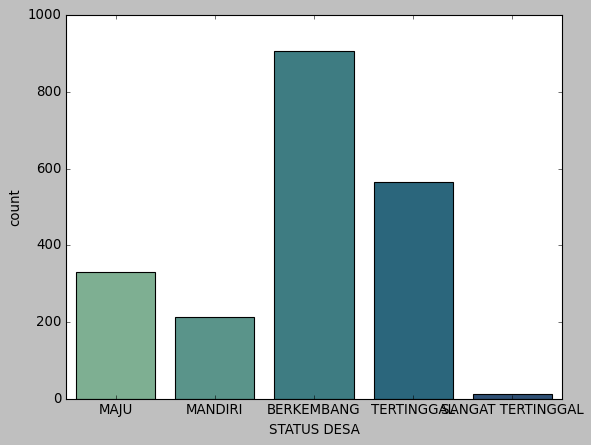

In [10]:
plt.style.use("classic")
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(x=df["STATUS DESA"], palette="crest");

In [3]:
dt1 = df.copy()
diDrop = ['Kabupaten','Kecamatan','Desa','KODE DESA','IKS','IKE','IKL','IDM']

In [4]:
dt1.drop(diDrop, axis=1, inplace=True)

In [5]:
dt1.head()

,Jarak ke sarana kesehatan terdekat,"Ketersediaan Tenaga Kesehatan(bidan,Dokter dan Nakes Lain)","Askes ke poskesdes, polindes atau posyandu",Tingkat Aktivitas Posyandu,Tingkat Kepesertaan BPJS,Akses Pendidikan Dasar SD/MI < 3 KM,Akses Pendidikan SMP/MTs < 6 KM,Akses Pendidikan SMA/SMK/MA < 6 KM,Kegiatan PAUD,Kegiatan PKBM/Paket A-B-C,...,Akses Penduduk ke Kredit,Tersedianya Lembaga Ekonomi Rakyat (Koperasi)/Bumdes,"Terdapat Usaha Kedai makanan, Restoran, Hotel dan Penginapan","Terdapat Moda (Angkutan Umum, Trayek Reguler dan Jam Operasi)",Jalan yang Dapat Dilalui oleh Kendaraan Bermotor Roda Empat atau Lebih,Kualitas Jalan Desa,"Pencemaran Air, Tanah dan Udara","Kejadian Bencana Alam (Banjir, Tanah Longsor, Kebakaran Hutan)",Upaya/Tindakan terhadap Potensi Bencana Alam,STATUS DESA
0,5,2,5,5,5,5,5,5,1,1,...,4,3,3,3,3,5,5,4,5,MAJU
1,5,2,5,3,3,5,5,4,5,1,...,4,1,3,3,5,5,5,5,5,MAJU
2,5,2,5,3,5,5,5,5,5,1,...,4,1,3,1,5,5,5,5,5,MAJU
3,5,2,5,3,5,5,5,5,5,1,...,5,3,3,5,5,5,5,4,5,MANDIRI
4,5,2,5,5,5,5,5,5,1,1,...,5,1,3,3,3,5,5,5,5,MAJU


In [15]:
dt1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2031 entries, 0 to 2030
Data columns (total 48 columns):
 #   Column                                                                  Non-Null Count  Dtype 
---  ------                                                                  --------------  ----- 
 0   Jarak ke sarana kesehatan terdekat                                      2031 non-null   int64 
 1   Ketersediaan Tenaga Kesehatan(bidan,Dokter dan Nakes Lain)              2031 non-null   int64 
 2   Askes ke poskesdes, polindes atau posyandu                              2031 non-null   int64 
 3   Tingkat Aktivitas Posyandu                                              2031 non-null   int64 
 4   Tingkat Kepesertaan BPJS                                                2031 non-null   int64 
 5   Akses Pendidikan Dasar SD/MI < 3 KM                                     2031 non-null   int64 
 6   Akses Pendidikan SMP/MTs < 6 KM                                         2031 non-null   

In [5]:
#coba = dt1.copy() coba2 ae

dt1['STATUS DESA']=pd.Categorical(dt1['STATUS DESA'])
dt1['STATUS_DESA_C']=dt1['STATUS DESA'].cat.codes

In [7]:
dt1.head(1)

,Jarak ke sarana kesehatan terdekat,"Ketersediaan Tenaga Kesehatan(bidan,Dokter dan Nakes Lain)","Askes ke poskesdes, polindes atau posyandu",Tingkat Aktivitas Posyandu,Tingkat Kepesertaan BPJS,Akses Pendidikan Dasar SD/MI < 3 KM,Akses Pendidikan SMP/MTs < 6 KM,Akses Pendidikan SMA/SMK/MA < 6 KM,Kegiatan PAUD,Kegiatan PKBM/Paket A-B-C,...,Tersedianya Lembaga Ekonomi Rakyat (Koperasi)/Bumdes,"Terdapat Usaha Kedai makanan, Restoran, Hotel dan Penginapan","Terdapat Moda (Angkutan Umum, Trayek Reguler dan Jam Operasi)",Jalan yang Dapat Dilalui oleh Kendaraan Bermotor Roda Empat atau Lebih,Kualitas Jalan Desa,"Pencemaran Air, Tanah dan Udara","Kejadian Bencana Alam (Banjir, Tanah Longsor, Kebakaran Hutan)",Upaya/Tindakan terhadap Potensi Bencana Alam,STATUS DESA,STATUS_DESA_C
0,5,2,5,5,5,5,5,5,1,1,...,3,3,3,3,5,5,4,5,MAJU,1


In [6]:
dt2 = dt1.drop(['STATUS DESA'], axis=1)
dt2.head()

,Jarak ke sarana kesehatan terdekat,"Ketersediaan Tenaga Kesehatan(bidan,Dokter dan Nakes Lain)","Askes ke poskesdes, polindes atau posyandu",Tingkat Aktivitas Posyandu,Tingkat Kepesertaan BPJS,Akses Pendidikan Dasar SD/MI < 3 KM,Akses Pendidikan SMP/MTs < 6 KM,Akses Pendidikan SMA/SMK/MA < 6 KM,Kegiatan PAUD,Kegiatan PKBM/Paket A-B-C,...,Akses Penduduk ke Kredit,Tersedianya Lembaga Ekonomi Rakyat (Koperasi)/Bumdes,"Terdapat Usaha Kedai makanan, Restoran, Hotel dan Penginapan","Terdapat Moda (Angkutan Umum, Trayek Reguler dan Jam Operasi)",Jalan yang Dapat Dilalui oleh Kendaraan Bermotor Roda Empat atau Lebih,Kualitas Jalan Desa,"Pencemaran Air, Tanah dan Udara","Kejadian Bencana Alam (Banjir, Tanah Longsor, Kebakaran Hutan)",Upaya/Tindakan terhadap Potensi Bencana Alam,STATUS_DESA_C
0,5,2,5,5,5,5,5,5,1,1,...,4,3,3,3,3,5,5,4,5,1
1,5,2,5,3,3,5,5,4,5,1,...,4,1,3,3,5,5,5,5,5,1
2,5,2,5,3,5,5,5,5,5,1,...,4,1,3,1,5,5,5,5,5,1
3,5,2,5,3,5,5,5,5,5,1,...,5,3,3,5,5,5,5,4,5,2
4,5,2,5,5,5,5,5,5,1,1,...,5,1,3,3,3,5,5,5,5,1


Tertinggal = 4
Sangat Tertinggal = 3
Mandiri = 2
Maju = 1
Berkembang = 0


# Traintest

In [7]:
X=dt2.drop(['STATUS_DESA_C'],axis=1)
Y=dt1['STATUS_DESA_C']
X.shape,Y.shape

((2031, 47), (2031,))

In [8]:
dt_test=dt2.sample(n=500)
x_test=dt_test.drop(['STATUS_DESA_C'],axis=1)
y_test=dt_test['STATUS_DESA_C']

In [9]:
model_tree=tree.DecisionTreeClassifier()
model_tree.fit(X,Y)

DecisionTreeClassifier()

In [10]:
y_pred=model_tree.predict(x_test)

In [11]:
print(y_pred)
y_test

[1 2 0 0 0 4 0 4 4 0 0 4 0 0 0 0 0 2 0 0 0 4 4 0 0 1 0 4 1 1 0 4 4 4 0 1 1
 0 4 0 0 0 0 2 4 0 1 1 0 4 4 0 2 1 4 1 0 0 0 1 0 0 4 0 0 1 0 0 0 4 2 4 0 2
 0 0 2 0 4 4 2 0 1 0 3 0 0 0 2 4 0 4 1 1 0 0 0 0 0 4 0 0 1 0 0 0 4 1 1 1 0
 1 4 0 4 0 0 4 4 1 0 4 4 4 0 0 4 1 2 4 4 4 2 1 0 1 1 0 0 1 0 1 1 4 0 1 0 0
 1 0 4 0 0 2 4 4 4 2 4 1 2 1 0 0 0 4 0 0 4 1 1 0 4 4 4 4 4 4 0 0 4 4 1 1 0
 0 0 2 1 1 1 0 4 0 4 2 2 0 0 4 0 4 0 2 3 1 0 0 0 0 4 4 0 0 2 0 1 4 4 0 4 0
 2 0 1 0 1 0 0 0 2 0 0 4 0 1 4 2 0 0 0 0 0 1 1 0 2 0 0 2 0 4 0 0 0 1 2 2 2
 0 1 0 1 0 1 0 4 4 1 0 4 3 0 0 0 4 0 2 0 0 0 0 4 2 2 0 4 0 4 0 0 1 4 2 1 0
 1 4 1 4 4 4 1 0 4 0 4 0 4 2 0 0 2 0 4 0 1 1 0 4 4 0 4 4 4 4 4 2 4 4 4 1 1
 0 0 1 1 4 2 0 2 4 4 0 4 1 2 4 0 0 0 0 4 4 0 4 2 2 1 0 0 0 1 0 4 0 2 0 0 4
 0 4 2 0 1 4 4 0 4 0 4 0 2 2 0 4 0 0 0 0 0 2 1 1 0 0 1 4 1 0 0 0 0 4 0 0 4
 4 4 0 1 4 2 1 1 1 0 1 1 4 1 0 2 2 2 2 0 0 0 0 0 0 1 0 1 4 4 0 4 0 1 0 0 2
 2 2 0 4 4 0 1 4 4 2 4 2 1 4 4 1 0 4 0 4 4 0 0 0 0 0 4 0 3 0 0 4 0 4 0 1 4
 0 4 0 4 4 0 0 4 0 4 2 2 

161     1
202     2
1209    0
60      0
131     0
       ..
1696    0
1842    4
603     4
1556    1
133     0
Name: STATUS_DESA_C, Length: 500, dtype: int8

# Eval

In [12]:
cm = confusion_matrix(y_test, y_pred)

In [13]:
y_test.value_counts()

0    217
4    137
1     86
2     56
3      4
Name: STATUS_DESA_C, dtype: int64

Tertinggal = 4 Sangat Tertinggal = 3 Mandiri = 2 Maju = 1 Berkembang = 0

In [14]:
cmdt = pd.DataFrame(cm,
                     index = ['Berkembang','Maju','Mandiri','Sangat Tertinggal','Tertinggal'], 
                     columns = ['Berkembang','Maju','Mandiri','Sangat Tertinggal','Tertinggal'])

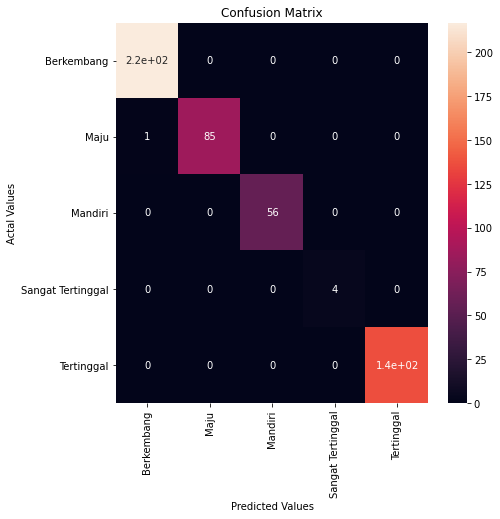

In [15]:
plt.figure(figsize=(7,7))
sns.heatmap(cmdt, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

# deci tree

In [19]:
featrue = ['Jarak ke sarana kesehatan terdekat',
                                         'Ketersediaan Tenaga Kesehatan(bidan,Dokter dan Nakes Lain)',
                                         'Askes ke poskesdes, polindes atau posyandu',
                                         'Tingkat Aktivitas Posyandu',
                                         'Tingkat Kepesertaan BPJS',
                                         'Akses Pendidikan Dasar SD/MI < 3 KM',
                                         'Akses Pendidikan SMP/MTs < 6 KM',
                                         'Akses Pendidikan SMA/SMK/MA < 6 KM',
                                         'Kegiatan PAUD',
                                         'Kegiatan PKBM/Paket A-B-C',
                                         'Kegiatan Kursus',
                                         'Taman Bacaan Masyarakat atau Perpusatkaan Desa',
                                         'Kebiasaan Gotong Royong',
                                         'Keterbukaan Ruang Publik',
                                         'Terdapat Kelompok Olahraga',
                                         'Terdapat Kegiatan Olahraga',
                                         'Keragaman Suku/Etnis di Desa',
                                         'Bahasa Sehari-hari Warga Desa',
                                         'Agama Mayoritas Warga Desa',
                                         'Tersedianya Sarana Pos Kamling di Desa',
                                         'Partisipasi Warga Siskamling',
                                         'Kejadian Perkelahian Massal di desa',
                                         'Terdapat Akses ke Sekolah Luar Biasa',
                                         'Terdapat Penyandang Kesejahteraan Sosial ( Anjal dan Pengemis)',
                                         'Mayoritas Warga MemilikI Sumber Air layak Minum',
                                         'Akses Warga Memiliki Air Mandi dan Mencuci',
                                         'Mayoritas Warga Memiliki Jamban',
                                         'Terdapat Tempat Pembuangan Sampah',
                                         'Jumlah Keluarga yang telah memiliki aliran listrik',
                                         'Warga Memiliki Telepon seluler dan Sinyal Kuat',
                                         'Akses Internet di Kantor Desa',
                                         'Terdapat Akses Internet untuk warga',
                                         'Terdapat Lebih dari Satu Jenis Kegiatan Ekonomi Penduduk',
                                         'Akses Penduduk ke Pusat Perdagangan (Pertokoan, Pasar Permanen)',
                                         'Terdapat Pasar Desa',
                                         'Terdapat Sektor Perdagangan (warung minimarket)',
                                         'Terdapat Kantor Pos dan Jasa Logistik',
                                         'Tersedianya Lembaga Pebankan Umum dan BPR',
                                         'Akses Penduduk ke Kredit',
                                         'Tersedianya Lembaga Ekonomi Rakyat (Koperasi)/Bumdes',
                                         'Terdapat Usaha Kedai makanan, Restoran, Hotel dan Penginapan',
                                         'Terdapat Moda (Angkutan Umum, Trayek Reguler dan Jam Operasi)',
                                         'Jalan yang Dapat Dilalui oleh Kendaraan Bermotor Roda Empat atau Lebih',
                                         'Kualitas Jalan Desa',
                                         'Pencemaran Air, Tanah dan Udara',
                                         'Kejadian Bencana Alam (Banjir, Tanah Longsor, Kebakaran Hutan)',
                                         'Upaya/Tindakan terhadap Potensi Bencana Alam']
clas = ['Berkembang','Maju','Mandiri','Sangat Tertinggal','Tertinggal']

In [24]:
import os

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

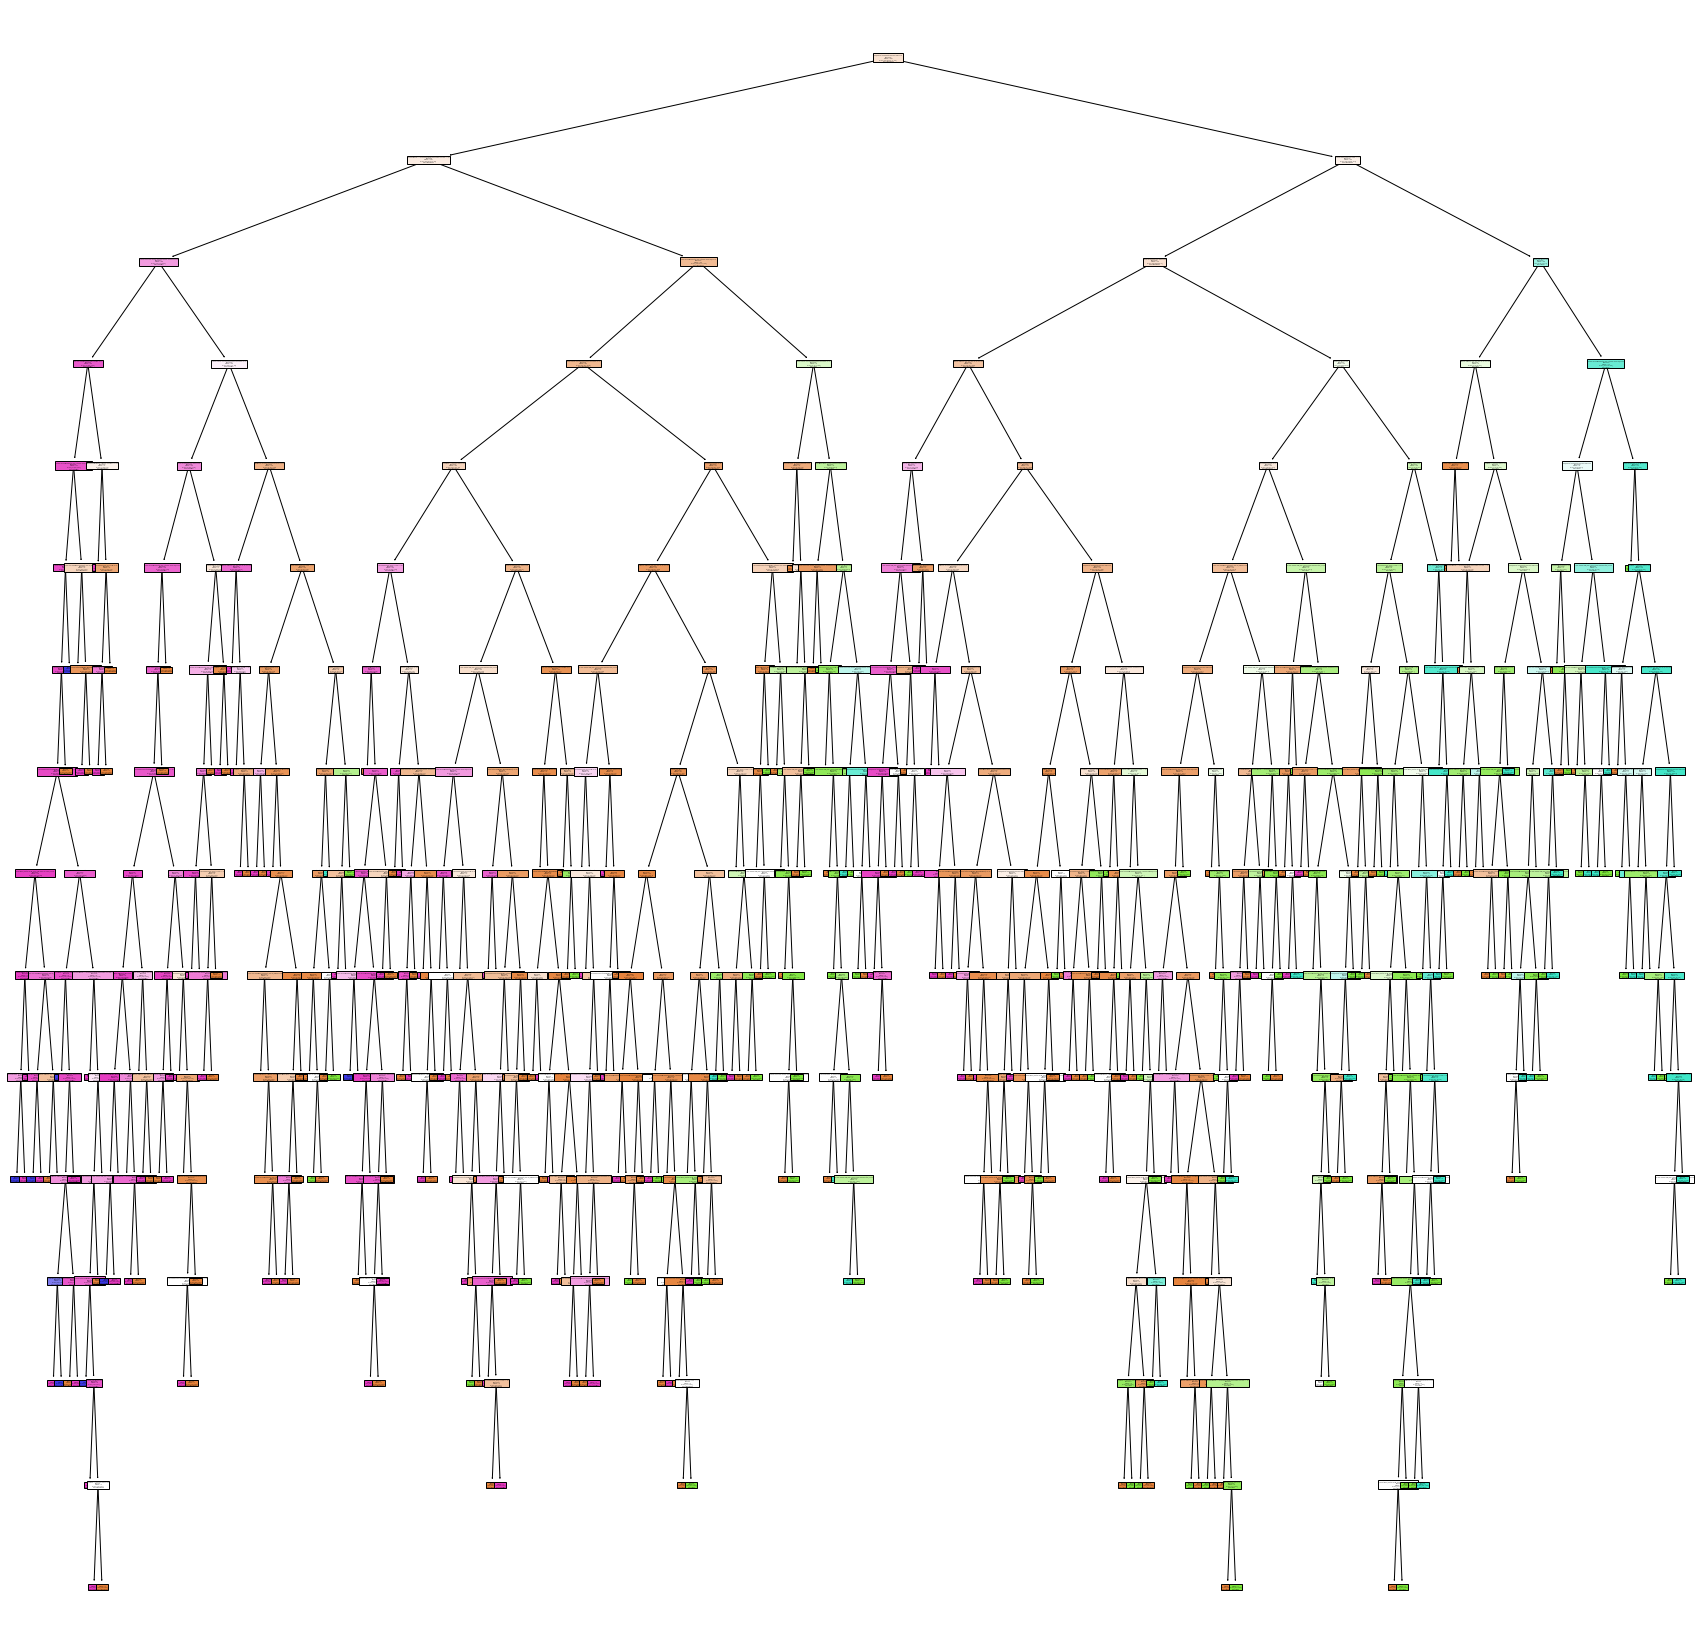

In [20]:
plt.figure(figsize=(30,30))
graph=tree.plot_tree(model_tree,filled=True,
                          feature_names=featrue,
                          class_names=clas)

In [21]:
model_file="decitree"
pickle.dump(model_tree, open(model_file, 'wb')) 

#loading the model
loaded_model=pickle.load(open(model_file, 'rb'))
loaded_model.predict(x_test)

array([1, 0, 4, 0, 4, 4, 0, 1, 0, 4, 4, 1, 1, 4, 4, 4, 4, 4, 2, 1, 0, 4,
       0, 1, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 4, 0, 4, 4, 0, 4, 4, 0, 0, 0,
       0, 1, 1, 4, 1, 4, 4, 0, 0, 4, 4, 0, 1, 4, 4, 0, 4, 2, 0, 1, 4, 0,
       4, 4, 1, 0, 0, 1, 0, 4, 4, 0, 2, 2, 0, 0, 4, 4, 0, 0, 0, 4, 1, 0,
       0, 0, 0, 4, 4, 0, 4, 0, 4, 4, 0, 4, 4, 0, 0, 2, 0, 2, 4, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 2, 0, 1, 1, 1, 1, 4, 0, 1, 1, 4, 0, 4, 1, 4, 0,
       0, 0, 0, 0, 0, 4, 0, 1, 4, 4, 2, 0, 0, 0, 4, 4, 0, 2, 0, 0, 0, 4,
       4, 2, 2, 0, 0, 4, 0, 2, 0, 4, 4, 0, 1, 0, 0, 1, 0, 1, 0, 1, 4, 0,
       0, 0, 0, 4, 0, 0, 0, 4, 1, 0, 0, 0, 4, 2, 0, 1, 0, 4, 4, 0, 0, 1,
       0, 4, 0, 0, 4, 4, 0, 0, 0, 2, 0, 0, 0, 4, 1, 1, 0, 1, 0, 0, 1, 2,
       4, 0, 2, 0, 2, 1, 0, 4, 2, 0, 3, 2, 0, 2, 0, 1, 1, 2, 0, 2, 0, 2,
       0, 1, 2, 0, 1, 4, 1, 4, 4, 0, 0, 1, 0, 4, 0, 0, 1, 0, 1, 4, 0, 3,
       0, 0, 1, 1, 4, 0, 2, 4, 0, 0, 4, 2, 2, 0, 1, 4, 1, 4, 0, 0, 0, 4,
       1, 1, 0, 0, 4, 0, 4, 0, 0, 4, 1, 4, 4, 4, 0,

In [16]:
round(accuracy_score(y_test, y_pred),3)

0.998